We want to build a Decision Tree whether a pet is cat or dog based on height and weight.We could divide these data points on certain values of one of the two characteristics (height and weight)?

In [ ]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#create the array including the data
data = [[8,8,'dog'],[50,40,'dog'],[8,9,'cat'],[15,12,'dog'],[9,9.8,'cat']]
print(data)
#generate a dataframe
df = pd.DataFrame(data,columns=['weight','height','label'])
df

[[8, 8, 'dog'], [50, 40, 'dog'], [8, 9, 'cat'], [15, 12, 'dog'], [9, 9.8, 'cat']]


,weight,height,label
0,8,8.0,dog
1,50,40.0,dog
2,8,9.0,cat
3,15,12.0,dog
4,9,9.8,cat


In [ ]:
#defining the predictors
X = df[['weight','height']]
#defining the target
Y = df['label']

In [ ]:
#initiating the model
dtree = DecisionTreeClassifier()
#fitting the model
dtree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree.predict([[9,9.8]])

array(['cat'], dtype=object)

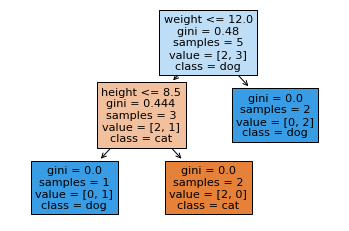

In [ ]:
from sklearn import tree
tree.plot_tree(dtree,feature_names=X.columns,class_names=["cat","dog"],filled=True)
plt.show()

In [ ]:
a = pd.read_csv("/content/mushrooms.csv")
a.head()
#a.info()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
#Load the dataset
df= pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [ ]:
def normalize(col):
  uniques = list(set(col))
  d = {u : i for (i,u) in enumerate(uniques)}
  for i in range(len(col)):
    col[i] = d[col[i]]
  return d
dicts = []
for i in range(len(df.columns)):
  dicts.append(normalize(df.values[:,i]))
print(dicts)

[{0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}, {0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}, {0: 0, 1: 1}, {0: 0, 1: 1}, {0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11}, {0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}, {0: 0}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}]


In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,6,1,3,1,1,0,7,1,1,3,3,3,3,0,2,0,2,5,0,4
1,1,2,3,9,1,7,1,1,1,7,1,2,3,3,3,3,0,2,0,2,6,3,3
2,1,5,3,4,1,0,1,1,1,8,1,2,3,3,3,3,0,2,0,2,6,3,2
3,0,2,1,4,1,3,1,1,0,8,1,1,3,3,3,3,0,2,0,2,5,0,4
4,1,2,3,1,0,6,1,0,1,7,0,1,3,3,3,3,0,2,0,4,6,4,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#checking for null values
#df.isnull().sum()

In [ ]:
X = df.values[:,1:]
print(X)

[[2 3 6 ... 5 0 4]
 [2 3 9 ... 6 3 3]
 [5 3 4 ... 6 3 2]
 ...
 [1 3 6 ... 7 2 0]
 [3 1 6 ... 4 1 0]
 [2 3 6 ... 3 2 0]]


In [ ]:
Y = df.values[:,0]
print(Y)
Y = Y.astype("int")
print(Y)

[0 1 1 ... 1 0 1]
[0 1 1 ... 1 0 1]


In [ ]:
Y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

In [ ]:
gini_classifier = tree.DecisionTreeClassifier(criterion='gini',random_state=9,
                                              max_depth=4,min_samples_leaf=2)
entropy_classifier = tree.DecisionTreeClassifier(criterion='entropy',
                                                 random_state=100,max_depth=3,
                                                 min_samples_leaf=2)

In [ ]:
gini_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

In [ ]:
entropy_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
gini_predict = gini_classifier.predict(X_test)
entropy_predict = entropy_classifier.predict(X_test)

In [ ]:
#Calculating accuracies
gini_accuracy = accuracy_score(y_test,gini_predict)*100
gini_accuracy

99.75389663658737

In [ ]:
entropy_accuracy = accuracy_score(y_test,entropy_predict)*100
entropy_accuracy

99.38474159146841

In [ ]:
a=25
print(a)
print("The value is",a)
print("The value is %d"%a)
print("The value is {}".format(a))
print(f'{a}') #f-string

25
The value is 25
The value is 25
The value is 25
25


In [ ]:
print(f'Accuracy of Gini Classifier = {gini_accuracy}
  \n Accuracy of Entropy Classifer = {entropy_accuracy}')

SyntaxError: ignored

In [ ]:
#print(classification_report(y_test,gini_predict))

In [ ]:
#print(classification_report(y_test,entropy_predict))

In [ ]:
X[4]

array([2, 3, 1, 0, 6, 1, 0, 1, 7, 0, 1, 3, 3, 3, 3, 0, 2, 0, 4, 6, 4, 3],
      dtype=object)

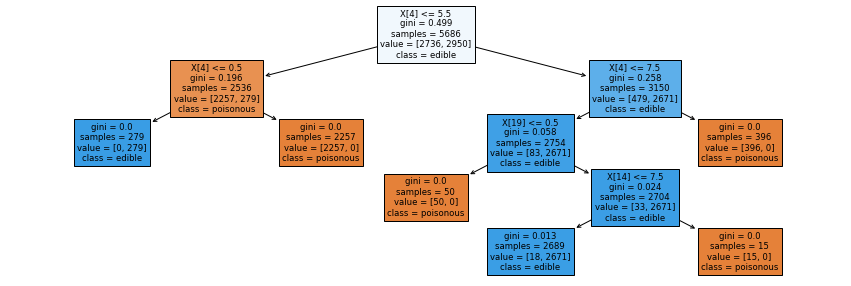

In [ ]:
tree.plot_tree(gini_classifier,class_names=['poisonous','edible'],
               filled=True)
plt.show()

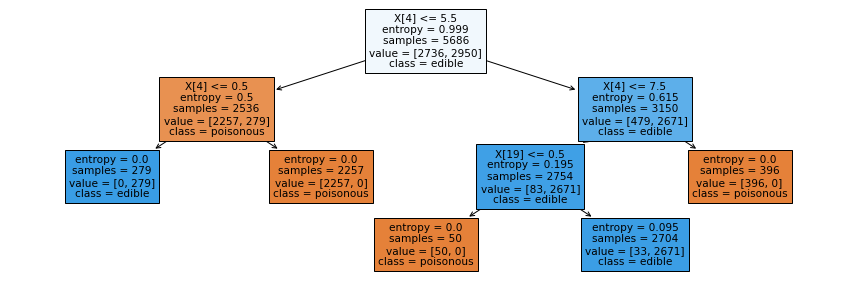

In [ ]:
tree.plot_tree(entropy_classifier,class_names=['poisonous','edible'],filled=True)
plt.show()